In [32]:
# Librerías
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(0)

In [3]:
#Generación aleatoria de datos sesgados
def datos_sesgados(sesgo, cantidad, maximo):
    aleatorios = stats.skewnorm.rvs(sesgo, loc = 2.5, size = cantidad, random_state = 0)
    aleatorios = aleatorios + abs(aleatorios.min())
    aleatorios = np.round(aleatorios, 2)/aleatorios.max() * maximo
    return np.round(aleatorios, 1)

In [4]:
edades = datos_sesgados(3,100000,62)

In [5]:
# Muestra
tamano_muestra = 100
muestra = np.random.choice(edades, tamano_muestra)
muestra

array([31.5, 34.2, 34.4, 31.1, 34.1, 35.7, 32.9, 40. , 29.1, 36.2, 36.4,
       30.3, 37.8, 31.8, 39.9, 29.9, 28.2, 31.1, 39.2, 41. , 26.7, 31.1,
       27.8, 33.7, 28.3, 35.2, 40.4, 30.7, 34. , 29.2, 42.6, 33.3, 36.1,
       29.7, 31.1, 37.3, 35.1, 36.3, 36.5, 39.9, 30. , 39.1, 37.9, 32.3,
       40.2, 34.2, 36.5, 33.6, 29.2, 45.2, 32.4, 41.9, 36.5, 38.1, 30.7,
       32.9, 33. , 32.1, 31.1, 32.6, 33.1, 32.9, 33.9, 25.9, 25.1, 35.5,
       47.5, 42.5, 33.2, 28.7, 29.3, 34.7, 32.8, 41.9, 36.2, 34.7, 32. ,
       43.8, 33.3, 36.1, 37.7, 35.7, 29. , 42. , 43.8, 30.6, 33.3, 34.2,
       37.6, 37.2, 30.3, 30.6, 30.8, 30.8, 31.4, 29.8, 25.8, 35.3, 34.5,
       29. ])

In [6]:
muestras_generadas = np.array([])
num_muestras = 1000
for i in range(num_muestras):
    muestras_generadas = np.append(muestras_generadas, np.random.choice(edades, tamano_muestra, replace = True))

muestras_generadas = muestras_generadas.reshape(-1, tamano_muestra)
muestras_generadas

array([[33.6, 30.2, 28.7, ..., 27.6, 36.2, 44.6],
       [29.8, 29.6, 32.5, ..., 34.5, 34.2, 31.6],
       [27. , 27.4, 38.6, ..., 31.1, 32.9, 30.8],
       ...,
       [29.5, 36.9, 29. , ..., 33.3, 31.7, 33.2],
       [34.2, 33.2, 32.7, ..., 31.1, 28.2, 31.4],
       [33.7, 31.4, 31.9, ..., 25. , 34.2, 30.6]])

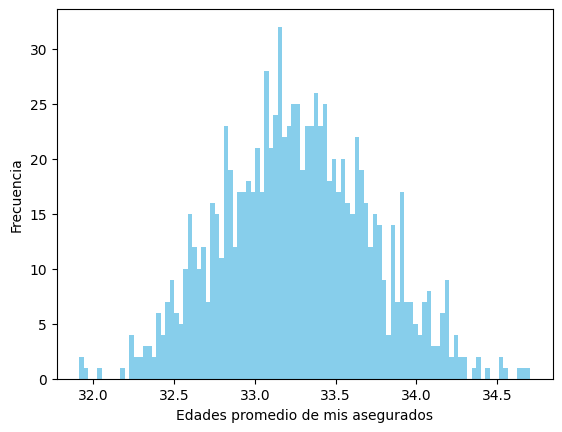

In [7]:
plt.hist(muestras_generadas.mean(axis = 1), bins=100, color = "skyblue")
plt.xlabel("Edades promedio de mis asegurados")
plt.ylabel("Frecuencia")
plt.show()

In [8]:
int_confianza = np.quantile(muestras_generadas.mean(axis = 1), [0.025, 0.975])

In [9]:
promedios_muestras = muestras_generadas.mean(axis=1)
media = promedios_muestras.mean()
media

33.263073000000006

In [10]:
q_025 = np.quantile(promedios_muestras, 0.025)
q_025

32.40395

In [11]:
q_975 = np.quantile(promedios_muestras, 0.975)
q_975

34.183125000000004

In [12]:
media_inicial = muestra.mean()
media_inicial

34.218

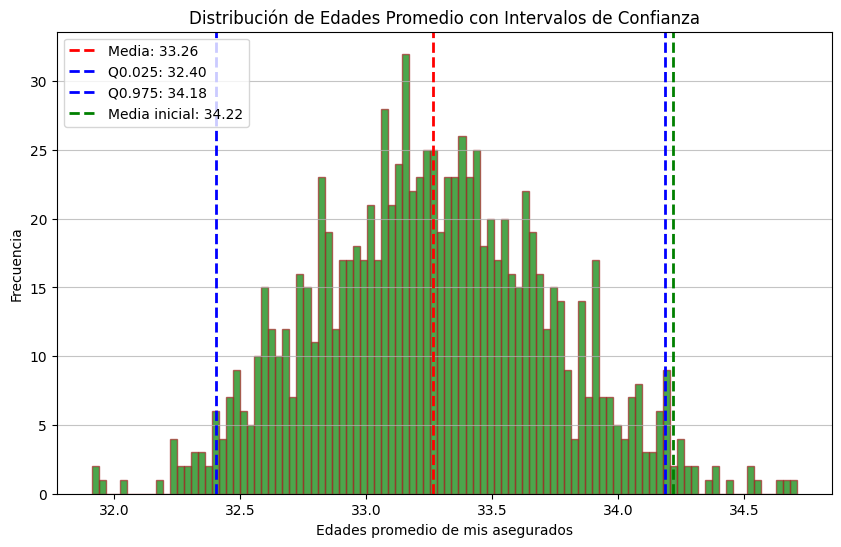

In [16]:
# Crear el histograma y agregar las líneas de los cuantiles y la media
plt.figure(figsize=(10, 6))
plt.hist(promedios_muestras, bins=100, color="green", edgecolor='brown', alpha=0.7)
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(q_025, color='blue', linestyle='--', linewidth=2, label=f'Q0.025: {q_025:.2f}')
plt.axvline(q_975, color='blue', linestyle='--', linewidth=2, label=f'Q0.975: {q_975:.2f}')
plt.axvline(media_inicial, color='green', linestyle='--', linewidth=2, label=f'Media inicial: {media_inicial:.2f}')

# Añadir etiquetas y leyenda
plt.xlabel("Edades promedio de mis asegurados")
plt.ylabel("Frecuencia")
plt.title("Distribución de Edades Promedio con Intervalos de Confianza")
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

##BOOTSTRAPPING


In [17]:
import yfinance as yf

In [18]:
from datetime import datetime

now = datetime.now()
dt_string = now.strftime("%d/%m/%Y")

In [19]:
Ticker = "BTC-USD"
Start_Date = "2023-10-18"
End_Date  = "2024-10-18"
data = yf.download(Ticker, Start_Date, End_Date)

[*********************100%***********************]  1 of 1 completed


In [20]:
print(data.head())

Price                         Adj Close         Close          High  \
Ticker                          BTC-USD       BTC-USD       BTC-USD   
Date                                                                  
2023-10-18 00:00:00+00:00  28328.341797  28328.341797  28889.009766   
2023-10-19 00:00:00+00:00  28719.806641  28719.806641  28892.474609   
2023-10-20 00:00:00+00:00  29682.949219  29682.949219  30104.085938   
2023-10-21 00:00:00+00:00  29918.412109  29918.412109  30287.482422   
2023-10-22 00:00:00+00:00  29993.896484  29993.896484  30199.433594   

Price                               Low          Open       Volume  
Ticker                          BTC-USD       BTC-USD      BTC-USD  
Date                                                                
2023-10-18 00:00:00+00:00  28174.251953  28413.531250  12724128586  
2023-10-19 00:00:00+00:00  28177.988281  28332.416016  14448058195  
2023-10-20 00:00:00+00:00  28601.669922  28732.812500  21536125230  
2023-10-21 00:00:

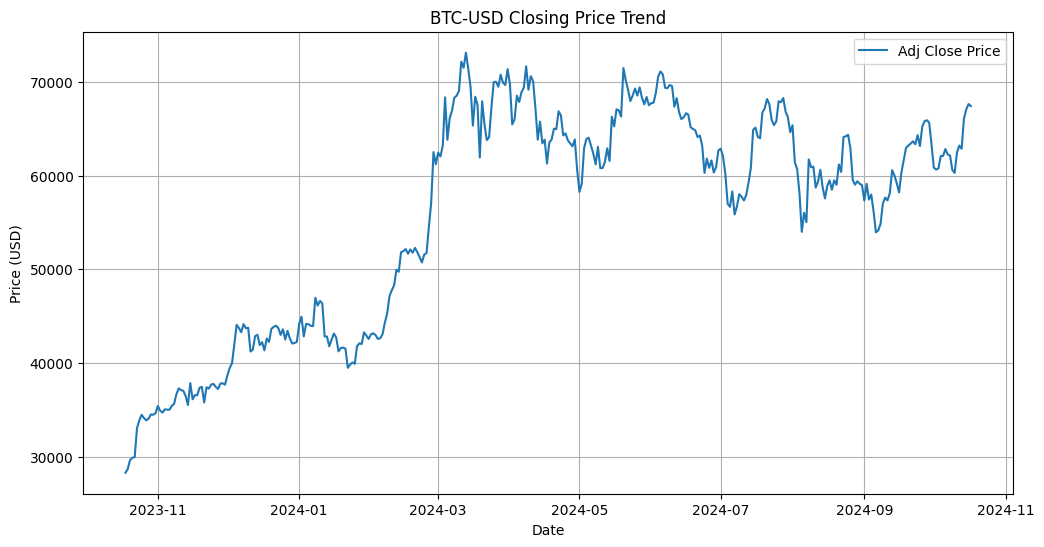

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Adj Close'], label='Adj Close Price')
plt.title('BTC-USD Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [33]:
datos = pd.DataFrame(data['Adj Close'])
datos

Ticker,BTC-USD
Date,
2023-10-18 00:00:00+00:00,28328.341797
2023-10-19 00:00:00+00:00,28719.806641
2023-10-20 00:00:00+00:00,29682.949219
2023-10-21 00:00:00+00:00,29918.412109
2023-10-22 00:00:00+00:00,29993.896484
...,...
2024-10-13 00:00:00+00:00,62851.375000
2024-10-14 00:00:00+00:00,66046.125000
2024-10-15 00:00:00+00:00,67041.109375


In [34]:
datos['Log_Return'] = np.log(datos['BTC-USD'] / datos['BTC-USD'].shift(-1))
datos

Ticker,BTC-USD,Log_Return
Date,,
2023-10-18 00:00:00+00:00,28328.341797,-0.013724
2023-10-19 00:00:00+00:00,28719.806641,-0.032986
2023-10-20 00:00:00+00:00,29682.949219,-0.007901
2023-10-21 00:00:00+00:00,29918.412109,-0.002520
2023-10-22 00:00:00+00:00,29993.896484,-0.098123
...,...,...
2024-10-13 00:00:00+00:00,62851.375000,-0.049581
2024-10-14 00:00:00+00:00,66046.125000,-0.014953
2024-10-15 00:00:00+00:00,67041.109375,-0.008490


In [35]:
datos_invertidos = datos[::-1].fillna(0)
datos_invertidos

Ticker,BTC-USD,Log_Return
Date,,
2024-10-17 00:00:00+00:00,67399.835938,0.000000
2024-10-16 00:00:00+00:00,67612.718750,0.003154
2024-10-15 00:00:00+00:00,67041.109375,-0.008490
2024-10-14 00:00:00+00:00,66046.125000,-0.014953
2024-10-13 00:00:00+00:00,62851.375000,-0.049581
...,...,...
2023-10-22 00:00:00+00:00,29993.896484,-0.098123
2023-10-21 00:00:00+00:00,29918.412109,-0.002520
2023-10-20 00:00:00+00:00,29682.949219,-0.007901


In [41]:
#Muestra
import random
#tamano_muestra = random.randint(1, 365)
tamano_muestra = 50
muestra = datos_invertidos['Log_Return'].head(tamano_muestra)
muestra

,Log_Return
Date,
2024-10-17 00:00:00+00:00,0.000000
2024-10-16 00:00:00+00:00,0.003154
2024-10-15 00:00:00+00:00,-0.008490
2024-10-14 00:00:00+00:00,-0.014953
2024-10-13 00:00:00+00:00,-0.049581
2024-10-12 00:00:00+00:00,0.005421
2024-10-11 00:00:00+00:00,-0.011906
2024-10-10 00:00:00+00:00,-0.035378
2024-10-09 00:00:00+00:00,0.005090


In [42]:
muestras_generadas = np.array([])
num_muestras = 1000
for i in range(num_muestras):
    muestras_generadas = np.append(muestras_generadas, np.random.choice(muestra, tamano_muestra, replace = True))

muestras_generadas = muestras_generadas.reshape(-1, tamano_muestra)
muestras_generadas

array([[-0.0135767 ,  0.00253331, -0.01288091, ...,  0.00542109,
         0.00542109,  0.00931261],
       [-0.03176403, -0.0039966 , -0.03571709, ..., -0.03571709,
         0.00509037,  0.00531411],
       [-0.03894551,  0.02526116,  0.00509037, ...,  0.02526116,
         0.03576248, -0.03894551],
       ...,
       [ 0.02828177,  0.04017886,  0.00336253, ...,  0.00168357,
         0.00939129, -0.01523424],
       [-0.03176403, -0.0116727 ,  0.00315353, ..., -0.0116727 ,
        -0.01288091,  0.00315353],
       [ 0.00315353, -0.03571709,  0.01818596, ..., -0.00849011,
        -0.04958055,  0.00168357]])

In [43]:
#5 índices aleatorios entre 0 y 999
indices_aleatorios = np.random.choice(muestras_generadas.shape[0], size=5, replace=False)

#5 filas aleatorias
filas_aleatorias  = muestras_generadas[indices_aleatorios]
filas_aleatorias

array([[-0.03537848, -0.03537848, -0.0031893 ,  0.00502307,  0.00336253,
        -0.0116727 , -0.01523424,  0.00453479, -0.04958055,  0.01818596,
        -0.00936755,  0.00336253,  0.00531411, -0.00400401,  0.00502307,
        -0.0039966 ,  0.00531411,  0.00531411,  0.00509037, -0.00147305,
         0.01687495, -0.00930963, -0.000362  ,  0.02885744, -0.00936755,
         0.02885744,  0.02526116,  0.00336253, -0.01097396, -0.00849011,
        -0.0031893 ,  0.03173873, -0.00208609,  0.00531411,  0.00336253,
        -0.03894551, -0.01288091,  0.00168357,  0.00336253,  0.04015297,
         0.00383726,  0.02885744, -0.02072112, -0.00936755, -0.00849011,
        -0.02199433,  0.00542109,  0.01687495, -0.00936755, -0.00208609],
       [-0.00930963, -0.02072112,  0.04015297, -0.00400401,  0.02526116,
        -0.03894551,  0.00253331,  0.01687495,  0.03173873, -0.000362  ,
        -0.01097396, -0.03894551,  0.01379834,  0.00542109,  0.        ,
         0.00531411, -0.0116727 , -0.01523424,  0.

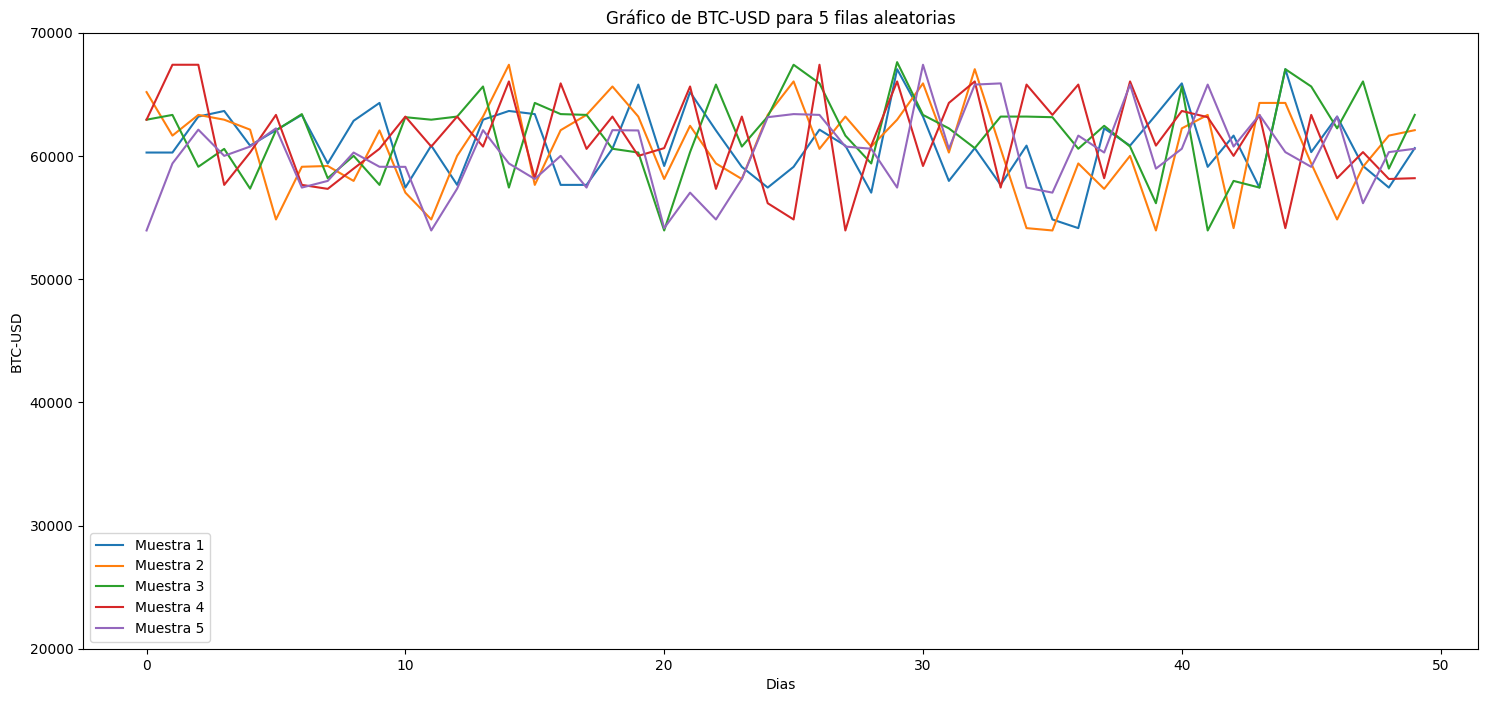

In [44]:
# Configurar el gráfico
plt.figure(figsize=(18, 8))

# Iterar sobre las filas aleatorias y graficarlas
for i in range(5):
    # Crear el DataFrame para la fila aleatoria
    tabla = pd.DataFrame(filas_aleatorias[i], columns=['Log_Return'])

    # Realizar el merge con datos_invertidos
    resultado = pd.merge(tabla, datos_invertidos, left_on='Log_Return', right_on='Log_Return', how='left')

    # Graficar la serie 'BTC-USD' resultante con un color diferente
    plt.plot(resultado['BTC-USD'], label=f'Muestra {i+1}')  # Etiqueta cada línea con su índice

# Añadir título y leyenda
plt.ylim(20000, 70000)
plt.title('Gráfico de BTC-USD para 5 filas aleatorias')
plt.xlabel('Dias')
plt.ylabel('BTC-USD')
plt.legend()
plt.show()